# Build the neural network

- The `torch.nn` namespace provides all the building blocks to build my own neural network.
- Every module subclasses the [`nn.Module`](https://docs.pytorch.org/docs/stable/generated/torch.nn.Module.html).
- A neural network is a module itself that consists of other modules (layers). The nested structure allows for building and managing complex architectures easily.

Here we'll build a neural network to classify images in the FashionMNIST dataset.

In [1]:
import os

import matplotlib.pyplot as plt
import seaborn as sns
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms


In [2]:
%load_ext watermark

In [3]:
device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


In [4]:
DATA_DIR="../local_data/transformer-mentor_data"

# Define the class



In [5]:
class NeuralNetwork(nn.Module):
    def __init__(self):  
        super().__init__()  # allow for access of the methods of nn.Module, a foundational class
        self.flatten = nn.Flatten() # reshape and reduce dimensions of data (see below)
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

## Understanding each line

`nn.Flatten()`

In [6]:
X = torch.rand(2, 1, 3, 3, device=device)
print("Original data:\n", X)
print(f"\nOriginal data shape: {X.size()}")

flatten = nn.Flatten()  # default params are start_dim=1 (first dim to flatten), end_dim=-1 (last dim to flatten)
print('\nFlattened data', flatten(X))
print(f"\nFlattened data shape: {flatten(X).size()}")

Original data:
 tensor([[[[0.5566, 0.3555, 0.8530],
          [0.6926, 0.5193, 0.0653],
          [0.1998, 0.0747, 0.0715]]],


        [[[0.3043, 0.7018, 0.6060],
          [0.0618, 0.3231, 0.5311],
          [0.5328, 0.7377, 0.8078]]]])

Original data shape: torch.Size([2, 1, 3, 3])

Flattened data tensor([[0.5566, 0.3555, 0.8530, 0.6926, 0.5193, 0.0653, 0.1998, 0.0747, 0.0715],
        [0.3043, 0.7018, 0.6060, 0.0618, 0.3231, 0.5311, 0.5328, 0.7377, 0.8078]])

Flattened data shape: torch.Size([2, 9])


[`nn.Linear`](https://docs.pytorch.org/docs/stable/generated/torch.nn.Linear.html)

"Applies an affine linear transformation to the incoming data."

affine = linear transformation + translation (shift) (bias term)

In [7]:
# provide a simple example (y=2x line); data is just three x points
X = torch.tensor([[1.], [2.], [3.]])  # Note: Use float tensors
print(f"Input shape: {X.size()}")

Input shape: torch.Size([3, 1])


In [25]:
m = nn.Linear(in_features=1, out_features=1)

In [18]:
# Normally the model would be trained, but here we'll manually set the weights and biases
with torch.no_grad():
    # Set weight to be a weight of 1)
    m.weight = nn.Parameter(torch.eye(1) * 2)
    # Set bias to be all zeros
    m.bias = nn.Parameter(torch.zeros(1))

# Perform the forward pass with the new weights
output = m(X)

In [19]:
output

tensor([[0, 1],
        [1, 2]])

In [20]:
print("\nOriginal weights:")
print(m.weight)

print(m.bias)


Original weights:
Parameter containing:
tensor([[2.]], requires_grad=True)
Parameter containing:
tensor([0.], requires_grad=True)


In [21]:
torch.eye(1) * 2

tensor([[2.]])

`nn.Relu`

In [22]:
input = torch.randn(10)

m = nn.Sigmoid()
output_sigmoid = m(input)
print(output_sigmoid)

m = nn.ReLU()
output_relu = m(input)
print(output_relu)


tensor([0.4184, 0.6875, 0.7649, 0.2569, 0.7377, 0.2258, 0.5722, 0.2562, 0.6795,
        0.5037])
tensor([0.0000, 0.7886, 1.1800, 0.0000, 1.0339, 0.0000, 0.2907, 0.0000, 0.7515,
        0.0148])


<Axes: >

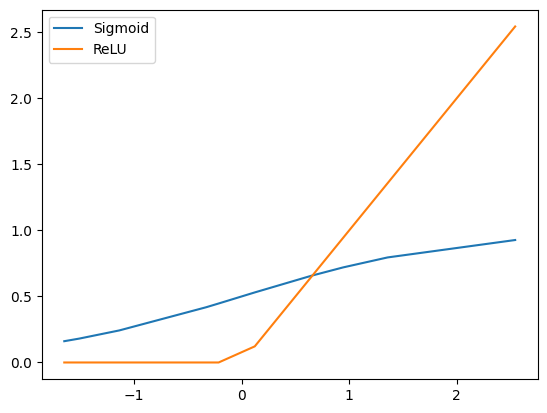

In [16]:
f, ax = plt.subplots(1, 1)
sns.lineplot(
    x=input.numpy(),
    y=output_sigmoid.numpy(),
    ax=ax,
    label='Sigmoid'
)

sns.lineplot(
    x=input.numpy(),
    y=output_relu.numpy(),
    ax=ax,
    label='ReLU'
)

A ReLU (rectified linear unit) activation function increases computational efficiency due to:
- sparse activation (allows for more zeros)
- simple to calculate (negative values are just zero)

[`nn.Sequential`](https://docs.pytorch.org/docs/stable/generated/torch.nn.Sequential.html#torch.nn.Sequential)

This chains the outputs of one module to be input sequentially for each subseqent module, returning the output of the last module.

In [27]:
X

tensor([[0, 1],
        [1, 2]])

In [31]:
X = torch.tensor([[0.,1.], [1., 2.]])
model = nn.Sequential(
    nn.Linear(in_features=2, out_features=2),
)

In [32]:
model(X)

tensor([[ 0.3406, -0.1285],
        [ 0.4911,  0.5373]], grad_fn=<AddmmBackward0>)

In [37]:
X = torch.tensor([[0.,1.], [1., 2.], [2., 3.]])

In [38]:
X.size()

torch.Size([3, 2])

In [35]:
flatten = nn.Flatten() 
flatten(X).size()

torch.Size([2, 2])

# Section 2

In [ ]:
%watermark

UsageError: Line magic function `%watermark` not found.


In [ ]:
%watermark -iv

torch      : 2.7.1
torchvision: 0.22.1
matplotlib : 3.10.3

